In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sbn
import json
import os
import sys
import pandas as pd
import pickle

root_path = os.environ['FCLA_ROOT']
data_path = os.environ['DATA_PATH']
sys.path.append(os.path.join(root_path,'scripts'))

from mergeResults import *

In [2]:
results = load_results(os.path.join(data_path, "solutions", "geometric", "gurobi"), os.path.join(data_path,'geometric'))

In [3]:
for col in results.columns:
    print('-----')
    print(results[col].value_counts())

-----
2.0    10
Name: facility_capacity, dtype: int64
-----
1487947852692219000249    1
1487947852650678000249    1
1487947852687485000249    1
1487947852696981000249    1
1487947852677224000249    1
1487947852664461000249    1
1487947852670516000249    1
1487947852657459000249    1
1487947852682964000249    1
1487947852701340000249    1
Name: id, dtype: int64
-----
2.0     4
7.0     3
12.0    2
17.0    1
Name: number of facilities, dtype: int64
-----
0.0       4
1101.0    1
842.0     1
365.0     1
1199.0    1
521.0     1
544.0     1
Name: objective, dtype: int64
-----
0.114345    1
0.005200    1
0.040502    1
0.373526    1
0.018963    1
0.001577    1
0.014643    1
0.017435    1
0.000087    1
0.004547    1
Name: runtime, dtype: int64
-----
0.714682    4
0.712664    3
0.758326    2
0.806825    1
Name: avg_clustering, dtype: int64
-----
9.350000     4
9.466667     3
10.300000    2
6.200000     1
Name: avg_degree, dtype: int64
-----
78.037433     4
84.708920     3
101.718447    2
133.8602

In [4]:
results[['id','vcount','objective','source_num','number of facilities']]

,id,vcount,objective,source_num,number of facilities
0,1487947852650678000249,10.0,0.0,1.0,2.0
1,1487947852657459000249,20.0,0.0,1.0,2.0
2,1487947852664461000249,20.0,544.0,11.0,7.0
3,1487947852670516000249,30.0,0.0,1.0,2.0
4,1487947852677224000249,30.0,521.0,11.0,7.0
5,1487947852682964000249,30.0,1199.0,21.0,12.0
6,1487947852687485000249,40.0,0.0,1.0,2.0
7,1487947852692219000249,40.0,365.0,11.0,7.0
8,1487947852696981000249,40.0,842.0,21.0,12.0
9,1487947852701340000249,40.0,1101.0,31.0,17.0


In [5]:
results_fcla = load_results(os.path.join(data_path, "solutions", "geometric", "fcla"), os.path.join(data_path,'geometric'))

In [6]:
results_fcla['algorithm'] = 'wma'
results['algorithm'] = 'gurobi'

In [7]:
all_results = pd.concat([results, results_fcla], axis=0)

In [8]:
all_results

,algorithm,avg_clustering,avg_degree,avg_dist,capacity of facilities,ecount,facility_capacity,id,lambda,max_degree,...,runtime,source_avg_clust,source_avg_degree,source_avg_dist,source_avg_eccentricity,source_num,source_std_dist,std_degree,std_dist,vcount
0,gurobi,0.806825,6.200000,133.860215,NaN,31.0,2.0,1487947852650678000249,NaN,9.0,...,0.004547,0.611111,9.000000,NaN,526.000000,1.0,NaN,2.760000,40306.292288,10.0
1,gurobi,0.758326,10.300000,101.718447,NaN,103.0,2.0,1487947852657459000249,NaN,16.0,...,0.005200,0.712121,12.000000,NaN,769.000000,1.0,NaN,11.710000,20510.875420,20.0
2,gurobi,0.758326,10.300000,101.718447,NaN,103.0,2.0,1487947852664461000249,NaN,16.0,...,0.017435,0.760093,10.363636,469.945455,812.727273,11.0,52496.124298,11.710000,20510.875420,20.0
3,gurobi,0.712664,9.466667,84.708920,NaN,142.0,2.0,1487947852670516000249,NaN,16.0,...,0.000087,0.833333,4.000000,NaN,1046.000000,1.0,NaN,15.582222,12827.952831,30.0
4,gurobi,0.712664,9.466667,84.708920,NaN,142.0,2.0,1487947852677224000249,NaN,16.0,...,0.014643,0.704214,10.545455,476.509091,953.000000,11.0,56426.249917,15.582222,12827.952831,30.0
5,gurobi,0.712664,9.466667,84.708920,NaN,142.0,2.0,1487947852682964000249,NaN,16.0,...,0.040502,0.715339,9.190476,527.457143,972.523810,21.0,64756.086259,15.582222,12827.952831,30.0
6,gurobi,0.714682,9.350000,78.037433,NaN,187.0,2.0,1487947852687485000249,NaN,16.0,...,0.001577,0.500000,8.000000,NaN,946.000000,1.0,NaN,12.977500,9301.169722,40.0
7,gurobi,0.714682,9.350000,78.037433,NaN,187.0,2.0,1487947852692219000249,NaN,16.0,...,0.018963,0.786171,8.545455,616.763636,1044.454545,11.0,86086.435041,12.977500,9301.169722,40.0
8,gurobi,0.714682,9.350000,78.037433,NaN,187.0,2.0,1487947852696981000249,NaN,16.0,...,0.114345,0.758072,8.809524,592.180952,1047.714286,21.0,77798.633923,12.977500,9301.169722,40.0
9,gurobi,0.714682,9.350000,78.037433,NaN,187.0,2.0,1487947852701340000249,NaN,16.0,...,0.373526,0.744357,9.354839,554.483871,1026.387097,31.0,73706.155116,12.977500,9301.169722,40.0


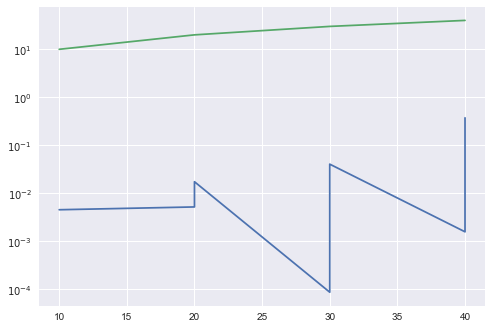

In [12]:
# plt.gca().set_xscale("log", nonposx='clip')
plt.gca().set_yscale("log", nonposy='clip')

plt.plot(results['vcount'],results['runtime'])
plt.plot(results_fcla['vcount'],results_fcla['vcount'])